<IPython.core.display.Javascript object>


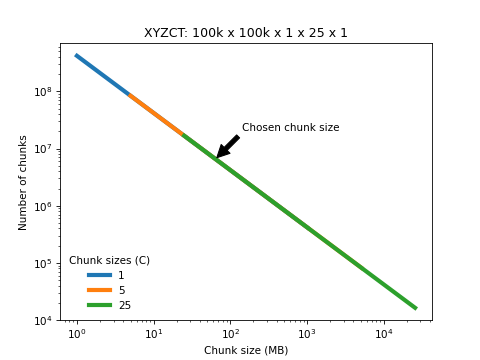

In [22]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

x = 131072
y = 131072
z = 1
t = 1
c = 25
chunkSizes = [32, 64, 128, 256, 512, 1024]
chunkT = 1
chunkZ = 1

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('Chunk size (MB)')
plt.ylabel('Number of chunks')
plt.title("XYZCT: 100k x 100k x 1 x 25 x 1")

for chunkC, color in (
        (1, "lightgray"),
        (5, "gray"),
        (25, "darkgray"),
    ):
    numFiles = []
    fileSize = []
    for i in chunkSizes:
        numFiles.__iadd__([(math.ceil(x/i) * math.ceil(y/i) * math.ceil(z/chunkZ) * math.ceil(t/chunkT) * math.ceil(c/chunkC))])
        fileSize.__iadd__([int((i * i * chunkC) / 1024)])
    line, = ax.plot(fileSize, numFiles, linewidth=4.0,
                    # color="gray",
                    label=f"{chunkC}")
    
plt.legend(loc="lower left", title="Chunk sizes (C)", frameon=False)


def file_count(i, chunkC):
    return math.ceil(x/i) * math.ceil(y/i) * math.ceil(z/1) * math.ceil(t/1) * math.ceil(c/chunkC)

def update(chunkC, displayMB=True, reScaleAxis=True):
    global line
    for chunkC in chunkSizes:
        numFiles = []
        fileSize = []
        for i in chunkSizes:
            numFiles.__iadd__([file_count(i, chunkC)])
            fileSize.__iadd__([int((i * i * chunkC) / 1024)])
        line.set_ydata(numFiles)
        if displayMB:
            plt.xlabel('Chunk Size X and Y (MB)')
            line.set_xdata(fileSize)
        else:
            plt.xlabel('Chunk Size X and Y')
            line.set_xdata(chunkSizes)
        if reScaleAxis:
            ax.relim()
            ax.autoscale_view()
        for i in range(len(numFiles)):
            print("X and Y chunk size:", chunkSizes[i], "    Number of files:", numFiles[i],"    Size in MB:", fileSize[i])
        fig.canvas.draw_idle()

def scale(scale):
    plt.yscale(scale)
    plt.xscale(scale)

scale('log')
#ax.annotate("X", xy=(256*256, 1000000), xycoords="data")
ax.annotate('Chosen chunk size',
            xy=((256*256/1024), file_count(256, 1)), xycoords='data',
            xytext=(25, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='bottom')
fig.savefig("/tmp/100k.png", dpi=800)

#interact(scale, scale=['log','linear']);
#interact(update, chunkC = (1,25), displayMB=True, reScaleAxis=True);